### Importing Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df= pd.read_csv('cardiovascular_diseases_dv3.csv',delimiter=';')
df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [139]:
df['PHYSICAL_ACTIVITY'].unique()

array([1, 0], dtype=int64)

In [8]:
#looking for null values
df.isnull().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

As we can see, there is no null values in data

In [9]:
#looking for duplicates in data
print(format(df.duplicated().sum()))

3820


3820 duplicates found!

In [13]:
duplicate_records = df[df.duplicated(keep=False)]
duplicate_records = duplicate_records.sort_values(by=['AGE', 'GENDER', 'HEIGHT','CARDIO_DISEASE'], ascending= False) 
duplicate_records .head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
58718,65,2,174,70,120,80,1,1,0,0,1,1
66083,65,2,174,70,120,80,1,1,0,0,1,1
47549,65,1,168,64,120,80,1,1,0,0,0,1
68150,65,1,168,64,120,80,1,1,0,0,0,1
37842,65,1,163,63,120,80,1,1,0,0,0,1


In [101]:
df['SMOKE'].value_counts()

0    58940
1     6023
Name: SMOKE, dtype: int64

In [130]:
df['SMOKE'] = df['SMOKE'].replace([0,1],['Smoker','Non Smoker'])
df['CHOLESTEROL'] = df['CHOLESTEROL'].replace([1,2,3],['Normal','Above normal','Well above normal'])


In [14]:
df.drop_duplicates(inplace=True)
print(format(df.duplicated().sum()))

0


C:\Users\hhamm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hhamm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hhamm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='WEIGHT', ylabel='Density'>

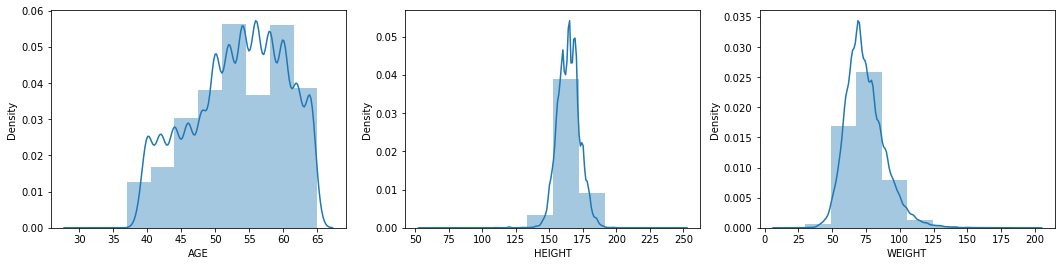

In [24]:
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.distplot(df.AGE, bins=10, kde=True, ax=axes[0])
sns.distplot(df.HEIGHT, bins=10, kde=True, ax=axes[1])
sns.distplot(df.WEIGHT, bins=10, kde=True, ax=axes[2])






C:\Users\hhamm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AP_HIGH', ylabel='Density'>

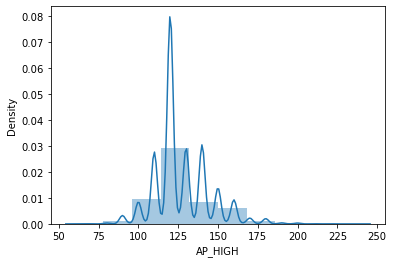

In [39]:
sns.distplot(df.AP_HIGH, bins=10, kde=True)

C:\Users\hhamm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AP_LOW', ylabel='Density'>

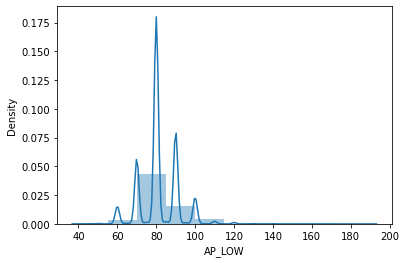

In [37]:
sns.distplot(df.AP_LOW, bins=10, kde=True)

<AxesSubplot:xlabel='AGE'>

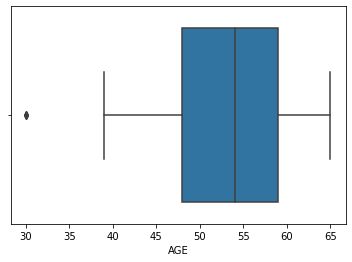

In [51]:
sns.boxplot(x=df["AGE"])


<AxesSubplot:xlabel='HEIGHT'>

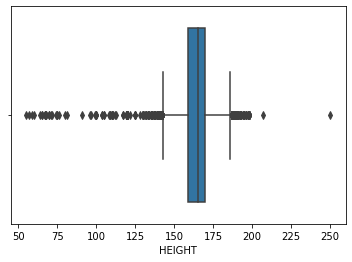

In [52]:
sns.boxplot(x=df["HEIGHT"])

<AxesSubplot:xlabel='WEIGHT'>

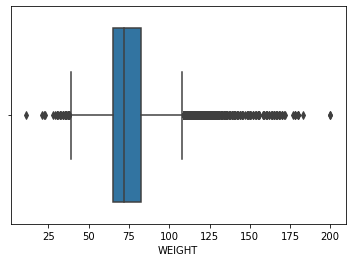

In [53]:
sns.boxplot(x=df["WEIGHT"])

Removing Outliers

In [60]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))


In [61]:
outliers(df[['HEIGHT', 'WEIGHT']])

For the feature HEIGHT, No of Outliers is 506
For the feature WEIGHT, No of Outliers is 1588


In [117]:
#Looking outliers in AP_HIGH and AP_LOW
print('As per our assumptions we have total {} outliers'.format(len(df[(df["AP_HIGH"]>250) | (df["AP_LOW"]>200)])))

As per our assumptions we have total 0 outliers


<AxesSubplot:xlabel='AGE', ylabel='Count'>

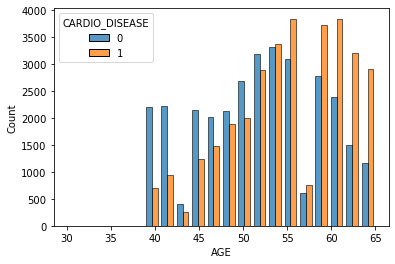

In [62]:
sns.histplot(df, x='AGE', hue='CARDIO_DISEASE',multiple='dodge', shrink=.75, bins=20)

In [75]:
df_cvd=df[df['CARDIO_DISEASE']==1]
df_ncvd=df[df['CARDIO_DISEASE'] == 0]


In [124]:
df['CHOLESTEROL'].value_counts()

1    47846
2     9283
3     7834
Name: CHOLESTEROL, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

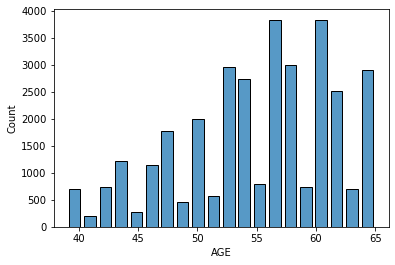

In [86]:
#plt.pie(df_cvd['AGE'].value_counts().values, autopct='%.0f%%')
#plt.show()
sns.histplot(df_cvd, x='AGE',multiple='dodge', shrink=.75, bins=20)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

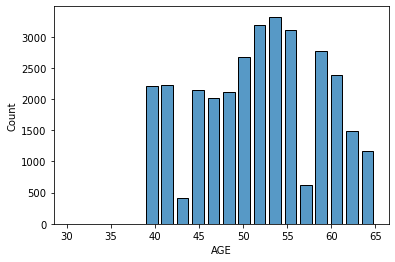

In [87]:
sns.histplot(df_ncvd, x='AGE',multiple='dodge', shrink=.75, bins=20)

<AxesSubplot:xlabel='WEIGHT', ylabel='Count'>

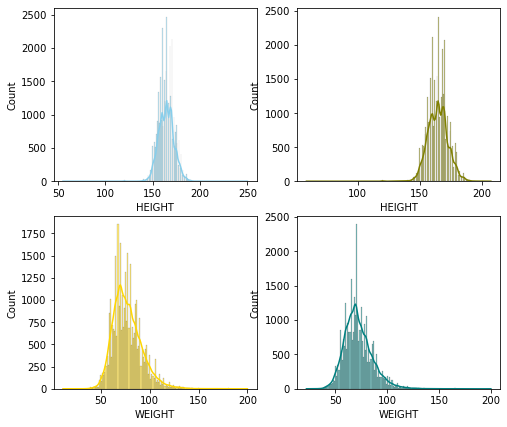

In [92]:
fig, axs = plt.subplots(2, 2, figsize=(8, 7))

sns.histplot(data=df_cvd, x="HEIGHT", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_ncvd, x="HEIGHT", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_cvd, x="WEIGHT", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_ncvd, x="WEIGHT", kde=True, color="teal", ax=axs[1, 1])



Features like Weight and Height are well distribuited for Non - CVD and CVD Population
Nothing much for takeaway


In [108]:
df_cvd['SMOKE'].value_counts()

0    30219
1     2834
Name: SMOKE, dtype: int64

In [109]:
df_ncvd['SMOKE'].value_counts()

0    28721
1     3189
Name: SMOKE, dtype: int64

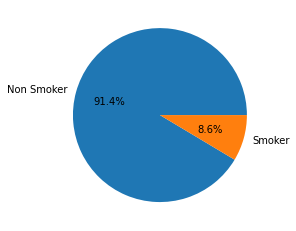

In [107]:
names=['Non Smoker', 'Smoker']
plt.pie(df_cvd['SMOKE'].value_counts(), labels = names,autopct='%1.1f%%')
plt.show() 

above chart show that very less percentage of smokers those effected by CVD

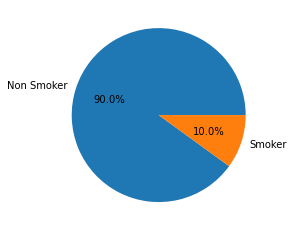

In [111]:

names=['Non Smoker', 'Smoker']
plt.pie(df_ncvd['SMOKE'].value_counts(), labels = names,autopct='%1.1f%%')
plt.show() 

Above  graph show that in non CVD there is very low percentage of smokers

<AxesSubplot:xlabel='AP_HIGH', ylabel='Count'>

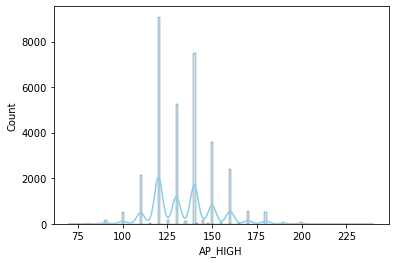

In [120]:
sns.histplot(data=df_cvd, x="AP_HIGH", kde=True, color="skyblue")

<AxesSubplot:xlabel='AP_LOW', ylabel='Count'>

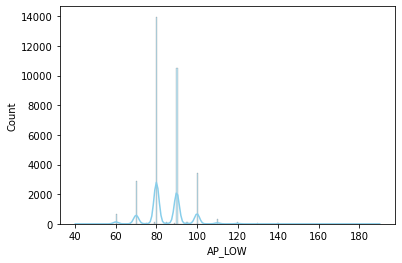

In [121]:
sns.histplot(data=df_cvd, x="AP_LOW", kde=True, color="skyblue")

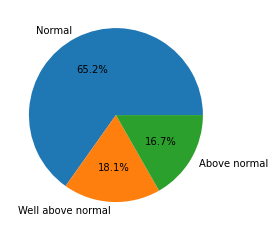

In [141]:

plt.pie(df_cvd['CHOLESTEROL'].value_counts(),labels = df['CHOLESTEROL'].unique(),autopct='%1.1f%%')
plt.show() 

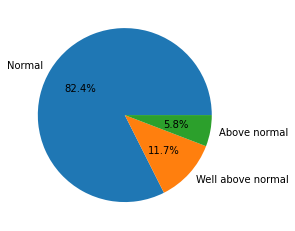

In [137]:
plt.pie(df_ncvd['CHOLESTEROL'].value_counts(),labels = df['CHOLESTEROL'].unique(),autopct='%1.1f%%')
plt.show()